# Seminar III: ARIMA modelling
=======================================
##### Lenka Nechvátalová (`lenka.nechvatalova@fsv.cuni.cz`)

## Contents
<a id='Contents'></a> 

- [ARIMA processes](#ARIMAprocesses)
- [1. Building ARMA models: the Box–Jenkins approach](#FittingARIMAmodels)
    - [1.1 Autoregressive AR(p) process](#AutoregressiveAR(p)process)
    - [1.2 Moving average MA(q) process](#MovingaverageMA(q)process)
    - [1.3 Mixed ARMA(p,q) process](#MixedARMA(p,q)process)
- [2. Fitting ARIMA model: Empirical example](#FittingARIMAmodelEmpiricalexample)
- [3. Fitting ARMA model - ARIMA example, overfit example](#FittingARMAmodel)
- [4. Exercise](#exercise)
- [5. ARFIMA processes](#ARFIMAprocesses)
- [Appendix](#Appendix)
    

Reading --  [Brooks](https://drive.google.com/file/d/1fJ3O5rf-NFjwiJ0ptk1h91MKbCUb24xo/view?usp=sharing), Chapter 5


In [31]:
rm(list = ls())

#install.packages(c("tseries", "forecast", "fracdiff"))

suppressPackageStartupMessages({
    library('tseries')    #Time Series Analysis and Computational Finance 
    library('forecast')  #Forecasting Functions for Time Series and Linear Models 
    library('fracdiff')    #Fractionally Differenced ARIMA aka ARFIMA(P,d,q) Models
    library('repr')        #Serializable Representations 
})
options(repr.plot.width=8, repr.plot.height=3) # set the plotting parameters   

# Autoregressive integrated moving average (ARIMA) processes:
<a id='ARIMAprocesses'></a> 

Source: [Brooks](https://drive.google.com/file/d/1fJ3O5rf-NFjwiJ0ptk1h91MKbCUb24xo/view?usp=sharing)
(5.6 ARMA processes, page 223 - 225)



________________________________________________________________________
________________________________________________________________________

By combining the $AR(p)$ and $MA(q)$ models, an $ARMA(p, q)$ model is obtained. Such a model states that the current value of some series $y$ depends linearly on its own previous values plus a combination of current and previous values of a **white noise error term**. The model could be written

$$ \phi(L)y_t = μ + \theta(L)u_t $$

where


$$\phi(L) = 1 - \phi_1 L - \phi_2 L^2 - ... - \phi_p L^p $$ and 

$$\theta(L) = 1 + \theta_1 L + \theta_2 L^2 + ... + \theta_p L^p $$
or

$$ y_t = \mu + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \theta_1 u_{t-1}+ \theta_2 u_{t-2}+ .... + \theta_q u_{t-q} + u_t$$

with

$$E(u_t) = 0;  E(u^2_t) = \sigma^2; E(u_t, u_s) = 0, t \neq s $$ 

The characteristics of an $ARMA$ process will be a combination of those from the autoregressive ($AR$) and moving average ($MA$) parts. Note that the $pacf$ is particularly useful in this context. The $acf$ alone can distinguish between a pure autoregressive and a pure moving average process. However, an  $ARMA$ process will have a geometrically declining $ac$f, as will a pure $AR$ process. So, the $pacf$ is useful for distinguishing between an $AR(p)$ process and an $ARMA(p, q)$ process -- the former will have a geometrically declining autocorrelation function, but a partial autocorrelation function which cuts off to zero after $p$ lags, while the latter will have both autocorrelation and partial autocorrelation functions which decline geometrically.

________________________________________________________________________
________________________________________________________________________

**We can now summarise the defining characteristics of AR, MA and ARMA processes.**

An autoregressive process has:
- a geometrically decaying acf
- a number of non-zero points of pacf = AR order.

A moving average process has:
- number of non-zero points of acf = MA order
- a geometrically decaying pacf.

A combination autoregressive moving average process has:
- a geometrically decaying acf
- a geometrically decaying pacf.

________________________________________________________________________
________________________________________________________________________

**Main topic for today:**
- Fitting ARMA process


**ARIMA models applications:**
- Fitting a mean equation of a time series; GARCH models are built using residuals from the ARIMA models
- Benchmarks for more complicated models
- Specific uses:
    - Bridge equation to forecast GDP
    - Measures of inflation persistance, etc.

# 1. Building ARMA models: the Box–Jenkins approach
<a id='FittingARIMAmodels'></a> 
Source: [Brooks](https://drive.google.com/file/d/1fJ3O5rf-NFjwiJ0ptk1h91MKbCUb24xo/view?usp=sharing)
(5.7 Building ARMA models: the Box–Jenkins approach, page 230 - 233)

### Summary: 

- __Identification__ 
    - Plot the time series
    - Check stationarity
    - Transform the series if needed to obtain stationary series (e.g., take log, log difference, difference,..)
    - Plot sample ACF and PACF
    - Assess the order of AR and MA process

- __Estimation__ 
    - Typically by maximum likelihood
  
- __Model validation__ 
    - Estimate the best model based on:
        - Parsimony (Parsimonious models explain data with a minimum number of parameters)
        - Goodness of fit (based on the information criteria)
            - Tools for model selection
            - Take into account model fit as well as parsimony
            - Akaike information criterion (AIC), AIC with correction for small sample size (AICc), (Schwarz) Bayes information criterion (BIC/SBIC/SC), Hannan-Quinn information criterion
    - Residuals from ARMA model should be white noise (no autocorrelation in the residuals left)    
        - Check ACF and PACF of residuals
        - Ljung-Box Q test to check for residual autocorrelation
        - plotting the histogram of the residuals
        - Jarque Bera normality test
    - Check squared residuals and their ACF and PACF - the residuals should be homoskedastic with no significant autocorrelations. If there are significant correlations in squared residuals, consider the ARMA-GARCH model (next seminar)
- __Forecasting__
    - Long-term forecasts from ARMA converge to a constant
    - Depending on the order of ARMA, short-term forecasts depend on a few previous realizations
    - we can evaluate the forecast performance using RMSE, MAE, MAPE or other metrics.
    

**Beware of overfitting**
- textbook by Brooks (section on Building ARMA models: the Box–Jenkins approach) discusses the problems that arise when we overfit and how it can give rise to common factors

- example showing this using simulated data : [3. Fitting ARMA model - example](#FittingARMAmodel) and in the following seminar materials.


> Examining whether the residuals are free from autocorrelation is much more
commonly used than overfitting, and this may partly have arisen since for ARMA
models, it can give rise to common factors in the overfitted model that make
estimation of this model difficult and the statistical tests ill behaved. For example,
if the true model is an ARMA(1,1) and we deliberately then fit an ARMA(2,2)
there will be a common factor so that not all of the parameters in the latter model
can be identified. This problem does not arise with pure AR or MA models, only
with mixed processes.



**Information criteria**

- AIC (Akaike information criterion)
    - $AIC = 2k - 2ln(L)$
- AICc (Akaike information criterion with correction for small sample size)
- BIC (Schwarz Bayesian information criterion, also SC, SBIC)
    - $BIC = kln(n) - 2ln(L)$
- HQC (Hannan–Quinn information criterion)

AIC and AICc tend to select models with a higher number of parameters. BIC and HQC have penalties for the number of parameters, therefore they usually select more parsimonious models.

**The Ljung-Box test is used to check if there exists autocorrelation in a time series.** 

The null hypothesis of the Box Ljung Test, $H_0$, is that our model does not show lack of fit (or in simple terms—the model is just fine). The alternate hypothesis, $H_a$, is just that the model does show a lack of fit. A significant $p$-value$ in this test rejects the null hypothesis that the time series isn't autocorrelated.

$H_0:$ no residual autocorrelation - model does **not** show lack of fit 

$H_a$: there is residual autocorrelation - model **does** show a lack of fit

**Jarque-Bera test**



The Jarque-Bera test is a goodness-of-fit test that determines whether or not sample data have skewness and kurtosis that matches a normal distribution. It tests the null of **normality** for $y$ using the Jarque-Bera test statistic. (H0: standardized residuals have skewness of 0 and kurtosis of 3)

Under the null hypothesis of normality, JB  ~ $X^2(2)$

**Forecasting using ARMA processes**
<a id='ForecastingusingARMAprocesses'></a>   

 - for the forecasting purposses, we use expected value of a given fitted model - the smallest mean squared forecasting error;
 - long-term forecasts from ARMA converge to a constant - mean of the series;
 - depending on the order of ARMA, short-term forecasts depend on a few previous realizations;
 - variances of forecast errors converge to the variance of the series as the forecast horizon increases.

Example:

AR(1) process: $$y_t = \mu + \phi_1 y_{t-1} + u_t $$

- 1-step ahead forecast: $ \mathbb{E}_t (y_{t+1}) = \mu + \phi_1 y_t $
- $k$-step ahead forecast: $ \mathbb{E}_t (y_{t+k}) = \mu (1 + \phi_1 + \ldots + \phi_1^{k-1}) + \phi_1^k y_t $

### 1.1 Autoregressive AR(p) process
<a id='AutoregressiveAR(p)process'></a>  



$$
y_t = \mu + \phi_1 y_{t-1} + \ldots + \phi_p y_{t-p} + u_t
$$

$$
y_t = \mu + \sum_{i=1}^{p} \phi_i y_{t-i} + u_t
$$

or using the lag operator, as

$$
y_t = \mu + \sum_{i=1}^{p} \phi_i L^i y_{t} + u_t
$$

or 

$$
\phi(L) y_t = \mu + u_t
$$

where $\phi(L) = (1 - \phi_1 L  - \phi_2 L^2 - ... -  - \phi_p L^p)$  and  $u_t$ is a residual $iid$ term. 


**The stationarity condition for an AR(p) model**: 

Setting $\mu$ to zero for a zero mean $AR(p)$ process, $y_t$, given by

AR process can be rewritten using the backshift operator as

$$
\phi(L) y_t =  u_t
$$

it would be stated that the process is stationary if it is possible to write


$$
 y_t =  \phi(L) ^{-1} u_t
$$

with $\phi(L) ^{-1}$ converging to zero. This means that the autocorrelations will decline eventually as the lag length is increased. When the expansion $\phi(L) ^{-1}$ is calculated, it will contain an infinite number of terms, and can be written as an $MA(∞)$, e.g. $a_1u_{t-1} + a_2u_{t-2}  + a_3u_{t-3} + ... + u_t$. If the process is stationary, the coefficients in the $MA(∞)$ representation will decline eventually with lag length. On the other hand, if the process is non-stationary, the coefficients in the $MA(∞)$ representation would not converge to zero as the lag length increases.

The condition for testing for the stationarity of a general AR(p) model is that the roots of the ‘characteristic equation’: 
$$
1 - \phi_1 z  - \phi_2 z^2 - ... -  - \phi_p z^p = 0
$$

all lie outside the unit circle. The notion of a characteristic equation is so-called because its roots determine the characteristics of the process $y_t$ -- for example, the acf for an AR process will depend on the roots of this characteristic equation, which is a polynomial in $z$.

--------------------------------



**ACF/PACF plots of different AR processes:**

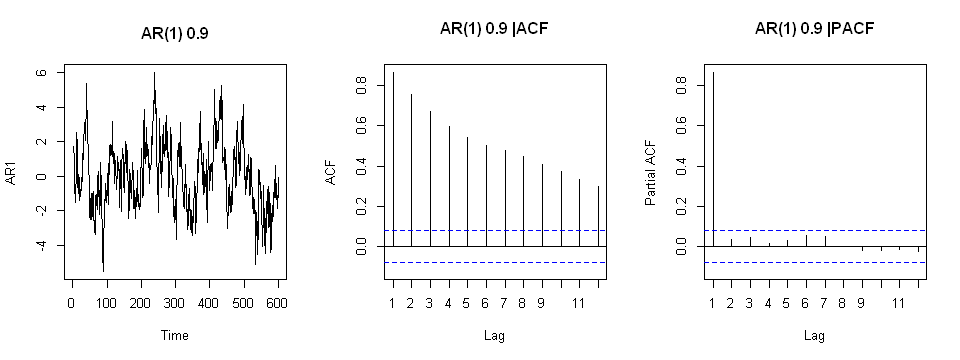

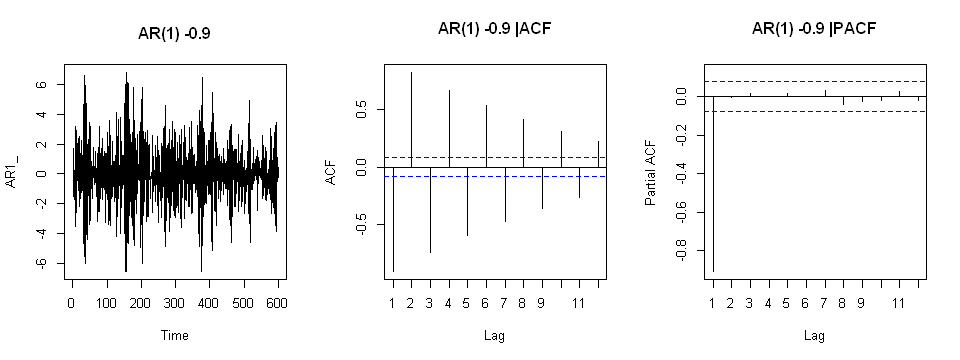

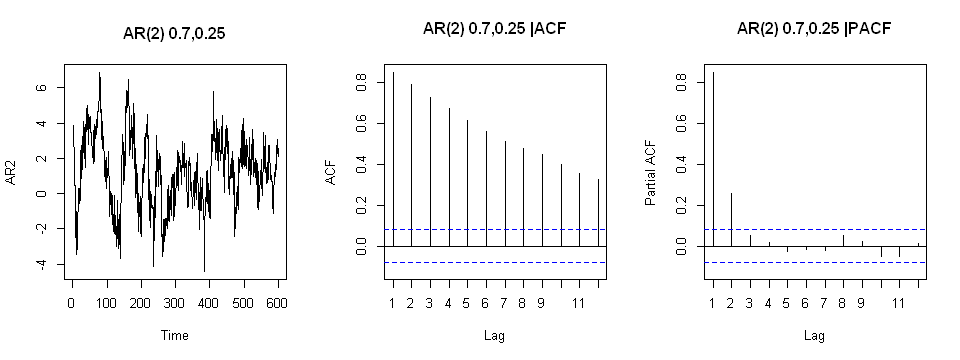

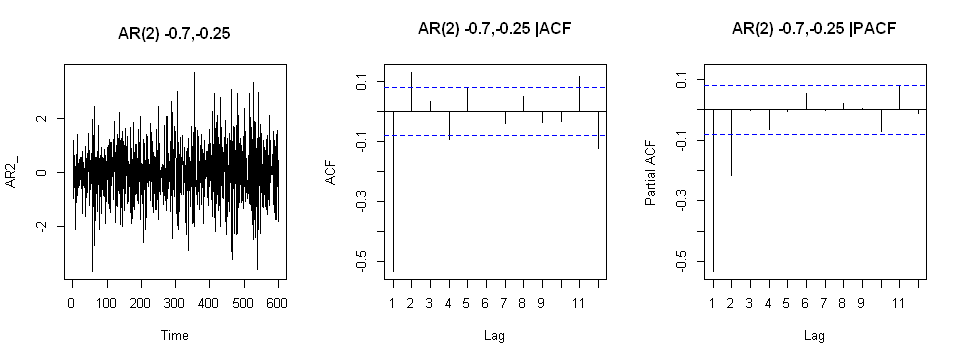

In [2]:
rm(list = ls())
set.seed(123)

# simulate time series
AR1   <- arima.sim(model = list(ar = c(0.9)), n = 600)
AR1_ <- arima.sim(model = list(ar = c(-0.9)), n = 600)

AR2 <- arima.sim(model = list(ar = c(0.7, 0.25)), n = 600)
AR2_ <- arima.sim(model = list(ar = c(-0.7, -0.25)), n = 600)


par(mfrow = c(1, 3))
ts.plot( AR1,  main='AR(1) 0.9')
Acf(AR1, lag.max = 12, main = "AR(1) 0.9 |ACF")
Pacf(AR1, lag.max = 12, main = "AR(1) 0.9 |PACF")

ts.plot(AR1_,  main='AR(1) -0.9')
Acf(AR1_, lag.max = 12, main = "AR(1) -0.9 |ACF")
Pacf(AR1_, lag.max = 12, main = "AR(1) -0.9 |PACF")

ts.plot(AR2 ,  main='AR(2) 0.7,0.25')
Acf(AR2, lag.max = 12, main = "AR(2) 0.7,0.25 |ACF")
Pacf(AR2, lag.max = 12, main = "AR(2) 0.7,0.25 |PACF")

ts.plot(AR2_ ,  main='AR(2) -0.7,-0.25')
Acf(AR2_, lag.max = 12, main = "AR(2) -0.7,-0.25 |ACF")
Pacf(AR2_, lag.max = 12, main = "AR(2) -0.7,-0.25 |PACF")


### 1.2 Moving average MA(q) process
<a id='MovingaverageMA(q)process'></a>  

 
Let $\{ x_t \}$ be a covarinace stationary process,

$$
y_t = \mu + u_t + \theta_1 u_{t-1} + \ldots + \theta_q u_{t-q}
$$

where $u_t$ is a residual $iid$ term. 

MA models are always weakly stationary because they are finite linear combinations of a white noise sequence for which the first two moments are time invariant. MA(1) process is invertible if $|\theta_1| < 1$. (for $MA(q)$ see 5.5.1 The invertibility condition pg.223) 

**Let’s simulate different MA processes and check their ACF and PACF**

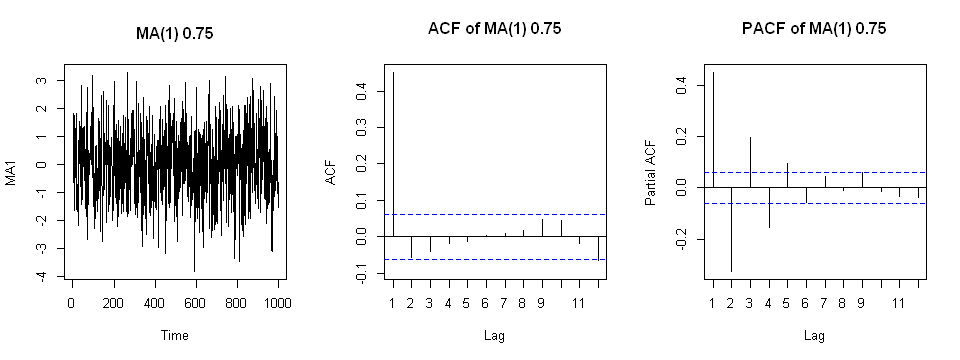

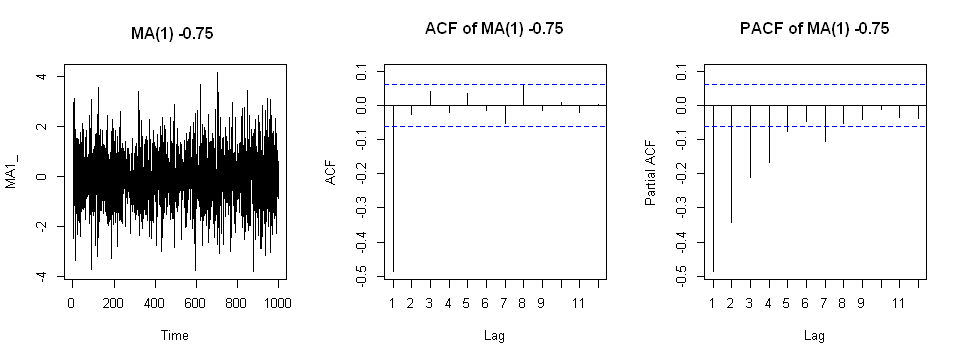

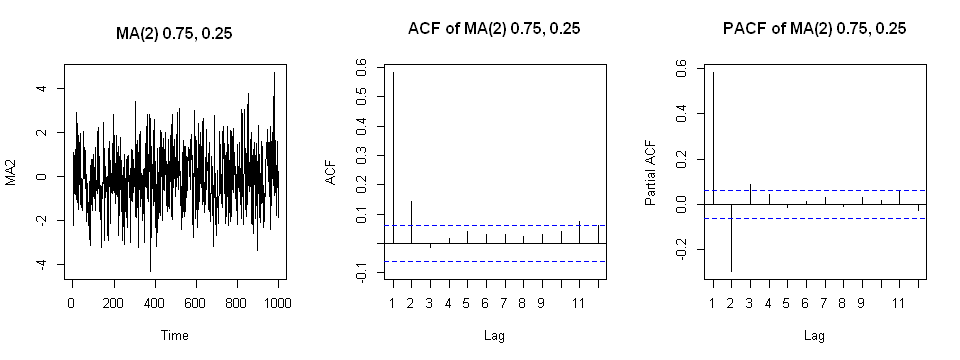

In [3]:
set.seed(123)
#Series
    MA1 <- arima.sim(model = list(ma = c(0.75)), n = 1000)
    MA1_ <-arima.sim(model = list(ma = c(-0.75)), n = 1000)
    MA2 <- arima.sim(model = list(ma = c(0.75, 0.25)), n = 1000)

par(mfrow = c(1, 3))

ts.plot(MA1 , main ='MA(1) 0.75')
    Acf(MA1, lag.max = 12, main = "ACF of MA(1) 0.75")
    Pacf(MA1, lag.max = 12, main = "PACF of MA(1) 0.75")

ts.plot(MA1_ , main ='MA(1) -0.75 ')
    Acf(MA1_, lag.max = 12, main = "ACF of MA(1) -0.75")
    Pacf(MA1_, lag.max = 12, main = "PACF of MA(1) -0.75")

ts.plot(MA2 , main ='MA(2) 0.75, 0.25')
    Acf(MA2, lag.max = 12, main = "ACF of MA(2) 0.75, 0.25")
    Pacf(MA2, lag.max = 12, main = "PACF of MA(2) 0.75, 0.25")


__Summary.__ A brief summary of AR and MA models is in order. We have discussed the following properties:


- for MA models, ACF is useful in specifying the order because ACF cuts off at lag q for an MA(q) series;
- for AR models, PACF is useful in order determination because PACF cuts off at lag p for an AR(p) process;
- an MA series is always stationary, but for an AR series to be stationary, all of its characteristic roots must be less than 1 in modulus;

### 1.3 Mixed ARMA(p,q) process
<a id='MixedARMA(p,q)process'></a>   


Let $\{ x_t \}$ be a covarinace stationary process,

$$ y_t = \mu + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \theta_1 u_{t-1}+ \theta_2 u_{t-2}+ .... + \theta_q u_{t-q} + u_t$$


where $u_t$ is a residual $iid$ term. Using the backshift operator, the model can be rewritten as

$$
(1 - \phi_1 L - \phi_2 L^2 - ... - \phi_p L^p ) y_t = (1 + \theta_1 L + \theta_2 L^2 + ... + \theta_q L^q) u_t
$$
otherwise
$$
\phi(L) y_t = \theta(L) u_t
$$

For the ARMA(p,q) process given by $\phi(L) y_t = \theta(L) u_t$ $y_t$ t is stationary if only if the roots of $\phi(L) = 0$ have all modulus greater than 1 or all the reciprocal roots have a modulus less than one (see https://math.unm.edu/~ghuerta/tseries/week4_1.pdf and stationarity condition for AR(p) ).


-------------------------

**Let’s simulate ARIMA(2,2) with different parameters:**

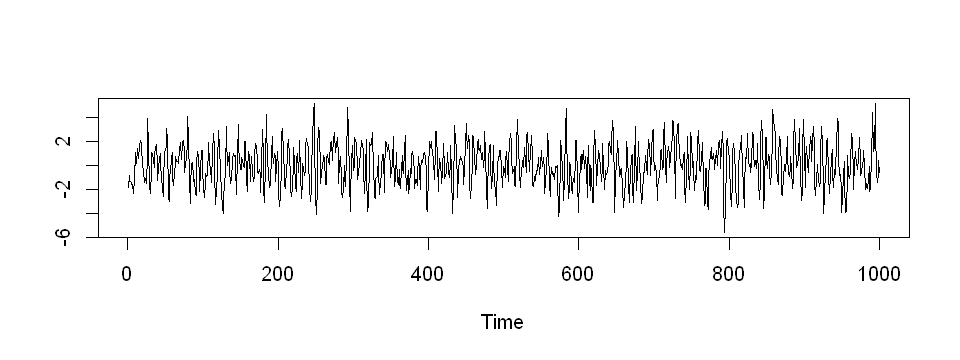

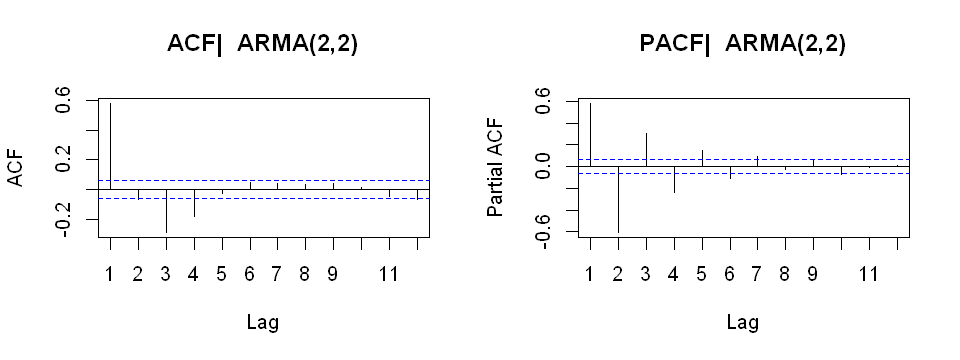

In [4]:
rm(list = ls())
set.seed(123)
#Series
    y3 <- arima.sim(model = list(ar = c(0.7, -0.4),  ma = c(0.6, -0.15)), n = 1000)
#Plot
    ts.plot(y3,ylab='')
#ACF/PACF
    par(mfrow=c(1,2))
    Acf(y3, lag.max = 12, main="ACF|  ARMA(2,2)")
    Pacf(y3, lag.max = 12, main="PACF|  ARMA(2,2)")

## -> we cannot estimate ARMA using OLS, but AR we can... the ARMA we cannot since there is an error from the previous period and we do not have means to obtain it or so...

# 2. Fitting ARIMA model: Empirical example with CZK/EUR exchange rate
<a id='FittingARIMAmodelEmpiricalexample'></a>  

Let’s work with real data now, and estimate an ARIMA model.

We will try to model CZK/EUR exchange rate which we investigated during the previous seminar


	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -1.8056, Lag order = 1, p-value = 0.6581
alternative hypothesis: stationary


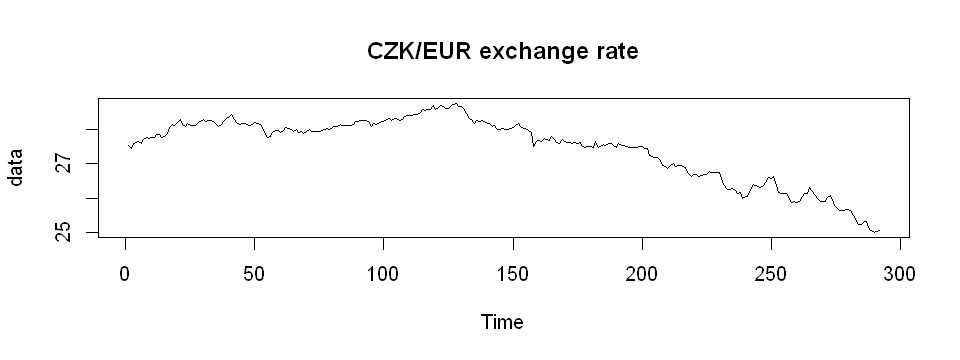

In [5]:
rm(list = ls())
options(repr.plot.width=8, repr.plot.height=3)
#Import Data
    data <- read.table("CZK_EUR_2008.txt")$V1
#Plot
    plot.ts(data, main='CZK/EUR exchange rate')
#Dickey-Fuller test for stationarity 
    adf.test(data, k = 1)

According to the ADF test, data are not stationary. As it is common in finance applications, let's compute the log returns

Warning message in adf.test(returns, k = 1):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  returns
Dickey-Fuller = -11.627, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


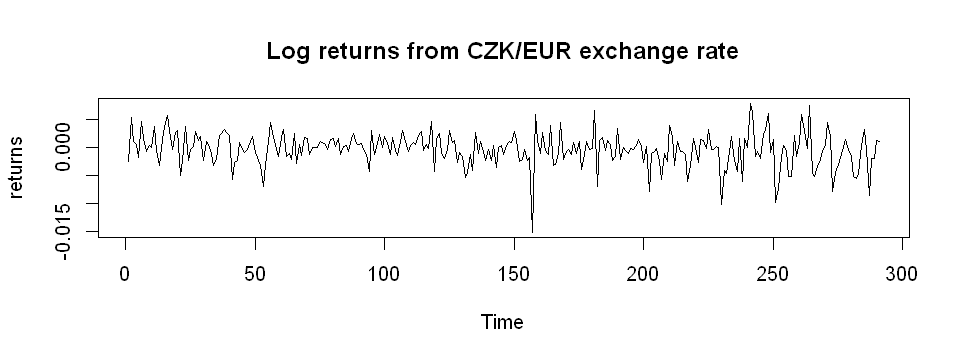

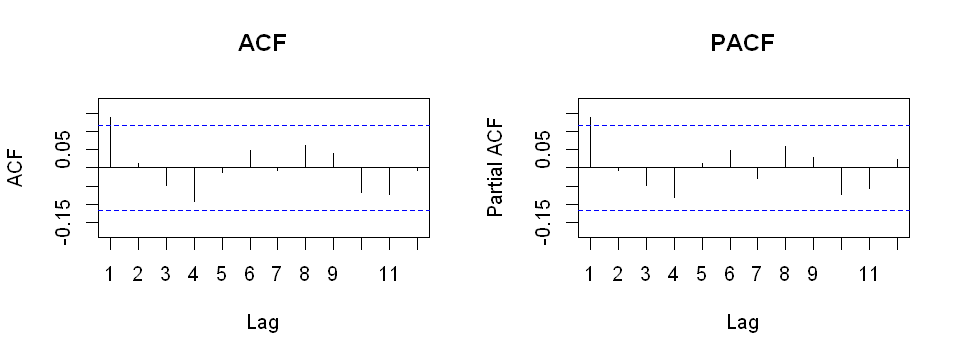

In [6]:
#Stationarize Data     
    returns <- diff(log(data))
#Plot
    plot.ts(returns, main='Log returns from CZK/EUR exchange rate')
#Dickey-Fuller test for stationarity 
    adf.test(returns, k = 1)
#ACF/PACF 
par(mfrow=c(1,2))
    Acf(returns, lag.max = 12, main="ACF")
    Pacf(returns, lag.max = 12, main="PACF")

**Which model to choose?**
**According to the ACF and PACF plots, the data look like an AR(1) process.**
- auto.arima selects the model with lowest criteria and can help us decide on the best model for our data. 


In [7]:
#Model fitting  - automatic selection of lags (here using AICc criterion)
    (fit.auto <- auto.arima(returns, seasonal = FALSE, stationary = TRUE, ic = 'aicc', stepwise = FALSE))

Series: returns 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.1383  -3e-04
s.e.  0.0580   2e-04

sigma^2 estimated as 8.5e-06:  log likelihood=1286.86
AIC=-2567.71   AICc=-2567.63   BIC=-2556.69

**Let's check the residuals. Let's investigate whether there is some dependency left in them:**

ar1  intercept 
0.01714827 0.11409667

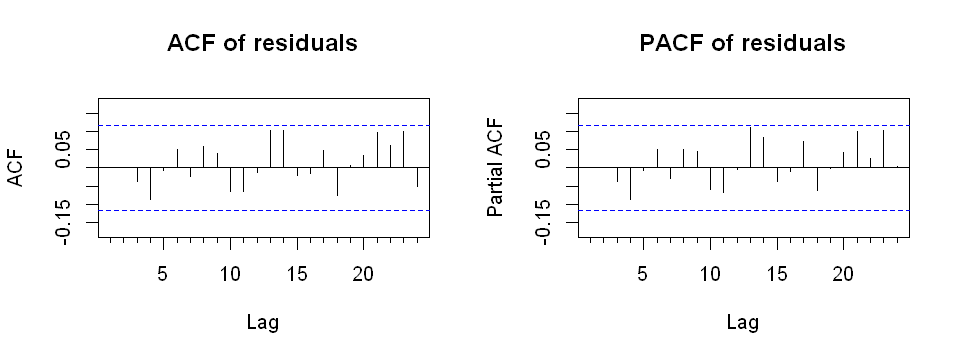

In [8]:
# manual fit (of the same model as selected by auto arima)
fit.manual <- arima(returns, order = c(1, 0, 0))
(1-pnorm(abs(fit.manual$coef)/sqrt(diag(fit.manual$var.coef))))*2 # calculate p-values for estimates

# check acf and pacf of residuals
par(mfrow = c(1,2))
    Acf(fit.manual$residuals, main = "ACF of residuals")
    Pacf(fit.manual$residuals, main = "PACF of residuals")

**The Ljung-Box test is used to check if there exists autocorrelation in a time series.** 

The null hypothesis of the Box Ljung Test, $H_0$, is that our model does not show lack of fit (or in simple terms—the model is just fine). The alternate hypothesis, $H_a$, is just that the model does show a lack of fit. A significant $p$-value$ in this test rejects the null hypothesis that the time series isn't autocorrelated.

$H_0:$ no residual autocorrelation - model sufficiently explains the autocorrelation in the time series, model does **not** show lack of fit 

$H_a$: there is residual autocorrelation - consider different model with more lags (or if there is heteroskedasticity consider GARCH model)

In [9]:
#The Ljung-Box test
    Box.test(fit.manual$residuals,  lag = 20, type = c("Ljung-Box"))


	Box-Ljung test

data:  fit.manual$residuals
X-squared = 17.182, df = 20, p-value = 0.6411


**Looks like there is nothing left. Residuals should be thus Gaussian white noise. Let's check the Gaussianity assumption.**

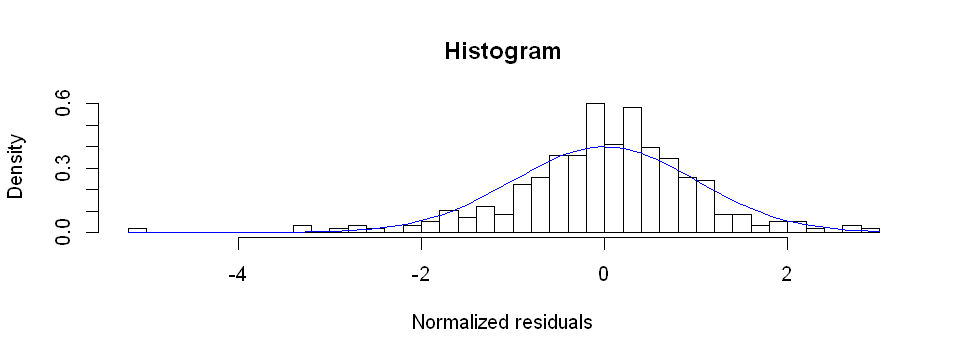

In [10]:
#store residuals in a vector
    residuals <- fit.manual$residuals
#normalize residuals 
    residuals.norm <- residuals/sqrt(fit.manual$sigma2)
#Plot the histogram
    hist(residuals.norm, prob = TRUE, breaks=40, xlab = "Normalized residuals", main="Histogram")
    curve(dnorm(x, mean = 0, sd = 1), col="blue", lwd=1, add=TRUE)

**Let's check formally using Jarque-Bera test**



The Jarque-Bera test is a goodness-of-fit test that determines whether or not sample data have skewness and kurtosis that matches a normal distribution. IT tests the null of **normality** for $y$ using the Jarque-Bera test statistic. (H0: standardized residuals have skewness of 0 and kurtosis of 3)

Under the null hypothesis of normality, JB  ~ $X^2(2)$

In [11]:
jarque.bera.test(residuals)


	Jarque Bera Test

data:  residuals
X-squared = 120.84, df = 2, p-value < 2.2e-16


**Jarque-Bera test - we reject the null hypothesis of normality.**

--------------------------------------------------

**It may be useful to model the second moment?**

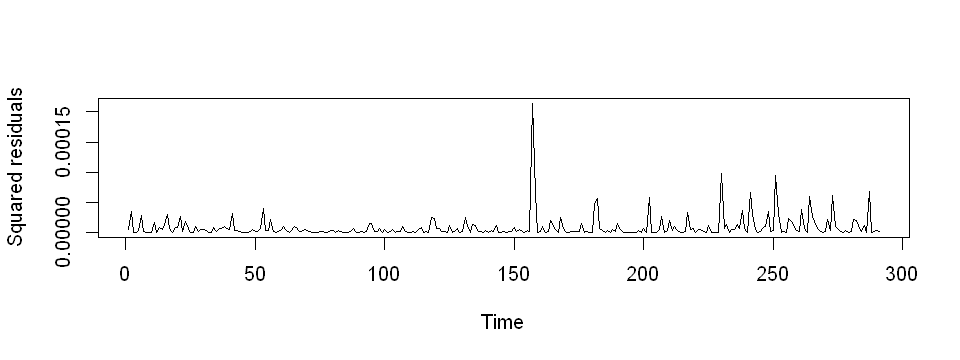

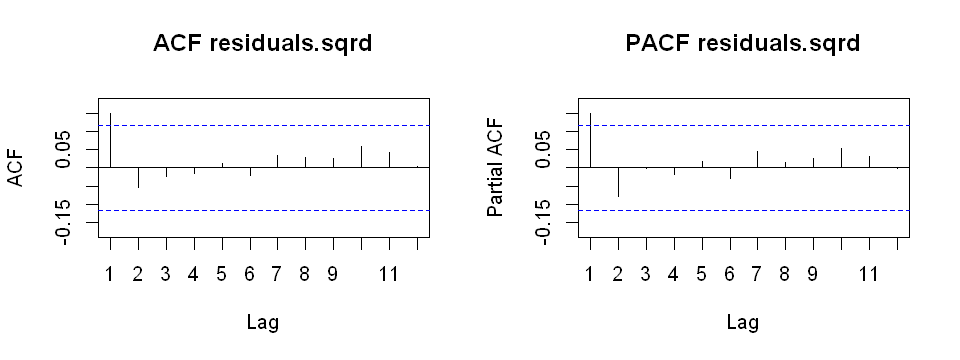

In [12]:
    residuals.sqrd <- residuals^2
    plot.ts(residuals.sqrd, ylab = "Squared residuals")

par(mfrow=c(1,2))
    Acf(residuals.sqrd, lag.max = 12, main="ACF residuals.sqrd")
    Pacf(residuals.sqrd, lag.max = 12, main="PACF residuals.sqrd")

Dependence in the squared residuals suggests that there is some serial structure in the second moment of the series. Solution: **volatility models (GARCH type of models, etc.)**, which will be covered in the next seminar.

**Let's compare the precision of our model**

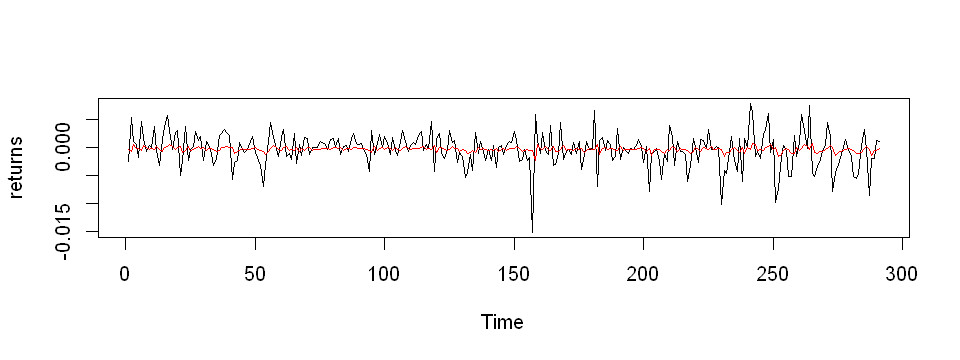

In [13]:
# returns vs fitted values
    plot.ts(returns)
    lines(fitted(fit.manual), col = "red")

**Let's try to forecast the future values using our model**

In [14]:
forecast(fit.manual, h=5)
# because we have ar(1) model, only the previous observation + estimated coefficients are used to calculate the forecast
# forecast quickly gets to the mean of the time series

    Point Forecast        Lo 80       Hi 80        Lo 95       Hi 95
292  -0.0001424450 -0.003865954 0.003581064 -0.005837061 0.005552171
293  -0.0003002595 -0.004059207 0.003458688 -0.006049074 0.005448555
294  -0.0003220844 -0.004081707 0.003437538 -0.006071930 0.005427761
295  -0.0003251027 -0.004084738 0.003434532 -0.006074968 0.005424763
296  -0.0003255201 -0.004085155 0.003434115 -0.006075386 0.005424346

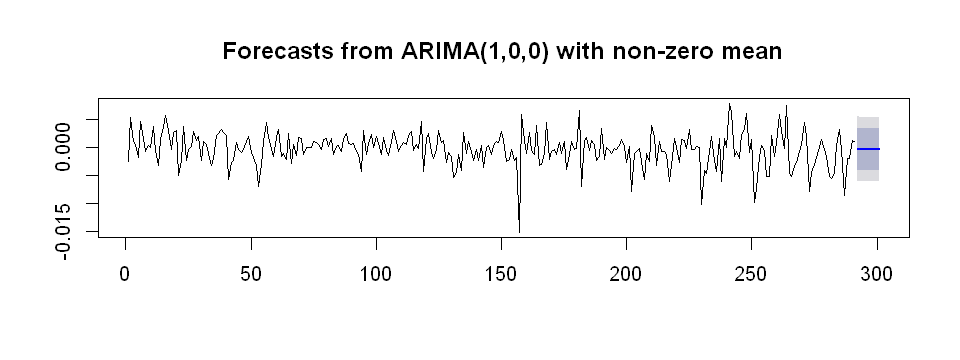

In [15]:
fcast <- forecast(fit.manual, h=10)
plot(fcast)

# 3. Fitting ARMA model  - simulated example with non-stationary data + example of overfitting
<a id='FittingARMAmodel'></a>   


#### 3.1. ARIMA(p,d,q) - order of integration selection

- if we know our series is stationary, we can restrict auto.arima by setting stationary=TRUE
- we can use auto.arima even if our data is not stationary and it will difference data as needed. However, if we want to work with log returns we have to transform the data before estimation.



In [16]:
set.seed(111)
r <- arima.sim(list(order = c(1,1,0), ar = 0.7), n = 200) #generate nonstationary process, after differencing it is ar(1)
tseries::adf.test(r)
auto.arima(r, ic='bic')


	Augmented Dickey-Fuller Test

data:  r
Dickey-Fuller = -2.4571, Lag order = 5, p-value = 0.3846
alternative hypothesis: stationary


Series: r 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.7723
s.e.  0.0454

sigma^2 estimated as 1.081:  log likelihood=-291.57
AIC=587.13   AICc=587.2   BIC=593.73

#### 3.2. Overfitting example:

- if we fit ARMA(p,q) with too high p,q
- In some cases, the information criteria can suggest an overfitted model (can be because of heteroskedasticity, but not necessarily).
- Usually, this happens more often with AIC than with BIC criterion

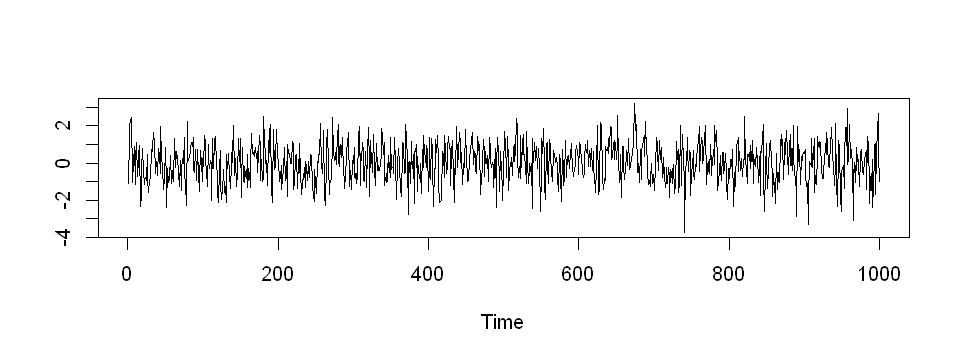

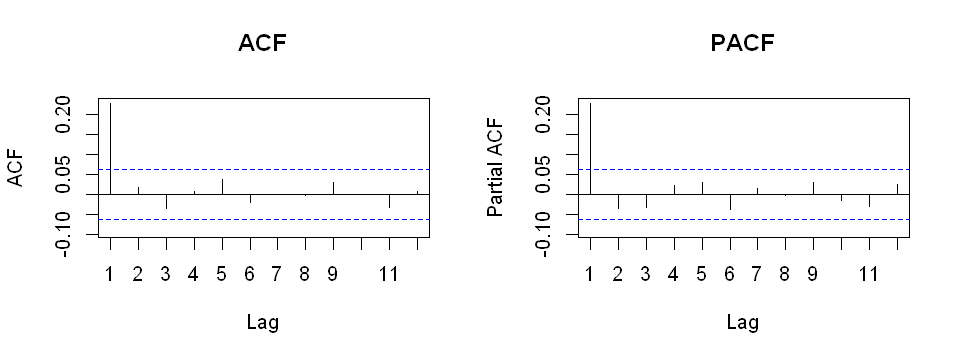

In [17]:
rm(list = ls())
set.seed(345)
#Series
    y0 <- arima.sim(model = list(ar = c(0.25)), n = 1000)
#Plot
    ts.plot(y0,ylab='')
#ACF/PACF
par(mfrow=c(1,2))
    Acf(y0, lag.max = 12, main="ACF")
    Pacf(y0, lag.max = 12, main="PACF")

In [18]:
# automatic selection of orders based on information criteria using AIC (same model selected for AICc)
# only the ar1 coefficient is statistically significant. Coefficients cancel each other, the ar1 coefficient is substantially higher than the true value.
auto.arima(y0, ic='aic')

Series: y0 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2      ma1
      0.5385  -0.1086  -0.3021
s.e.  0.4364   0.0990   0.4374

sigma^2 estimated as 1.048:  log likelihood=-1441.04
AIC=2890.08   AICc=2890.12   BIC=2909.71

In [19]:
# Depending on parameters used in auto.arima function, we can get even more overfitted models:
# here we include stepwise=FALSE, which allows searching through more models + AIC criterion. 
# According to the automatized procedure, the ARMA(5,0) model is the best fit. However, if you look at the estimated coefficients, only the first lag is significant. 
auto.arima(y0, seasonal = FALSE, ic = 'aic', stationary = TRUE, stepwise=FALSE) # you can use stepwise = false -- searching over more possible models, slower

Series: y0 
ARIMA(5,0,0) with zero mean 

Coefficients:
         ar1      ar2      ar3     ar4     ar5
      0.2349  -0.0269  -0.0378  0.0162  0.0312
s.e.  0.0316   0.0325   0.0326  0.0326  0.0319

sigma^2 estimated as 1.048:  log likelihood=-1439.95
AIC=2891.91   AICc=2891.99   BIC=2921.36

In [20]:
# using BIC instead of AIC: (higher penalty for more parameters)
# AR(1) selected, compare the coefficient from this model to models above.
auto.arima(y0, seasonal = FALSE, ic = 'bic', stationary = TRUE, stepwise=FALSE) # you can use stepwise = false -- searching over more possible models, slower

Series: y0 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.2277
s.e.  0.0308

sigma^2 estimated as 1.048:  log likelihood=-1441.91
AIC=2887.83   AICc=2887.84   BIC=2897.64

In [21]:
#Model fitting - manually
arima(y0, order = c(1, 0, 0))

arima(y0, order = c(2, 0, 0))
arima(y0, order = c(2, 0, 1)) # convergence problem - this model should not be used


#(1-pnorm(abs(model$coef)/sqrt(diag(model$var.coef))))*2 # calculate p value for estimates


Call:
arima(x = y0, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2276     0.0047
s.e.  0.0308     0.0419

sigma^2 estimated as 1.047:  log likelihood = -1441.91,  aic = 2889.81


Call:
arima(x = y0, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.2360  -0.0365     0.0047
s.e.  0.0316   0.0317     0.0404

sigma^2 estimated as 1.046:  log likelihood = -1441.24,  aic = 2890.49

Warning message in arima(y0, order = c(2, 0, 1)):
"possible convergence problem: optim gave code = 1"


Call:
arima(x = y0, order = c(2, 0, 1))

Coefficients:
         ar1      ar2      ma1  intercept
      0.6091  -0.1234  -0.3716     0.0061
s.e.  0.5197   0.1107   0.5226     0.0395

sigma^2 estimated as 1.045:  log likelihood = -1441.05,  aic = 2892.1

In [22]:
# if we want to compare two NESTED models, we can also use likelihood ratio test - LR test
# this allows formally testing, while with information criteria we can only compare numbers and select the highest

# using log likelihood to calculate LR:
#h0: restrictions hold - restricted model is better
#h1: unrestricted model better

restricted_model = arima(y0, order = c(1, 0, 0))
unrestricted_model = arima(y0, order = c(2, 0, 1))
df = 2 # number of restrictions in the restricted model compared to unrestricted one

lrstat <- 2*(unrestricted_model$loglik - restricted_model$loglik)
lrstat
# getting p-value 
pchisq(lrstat, df = df, lower.tail = F) 

# alternatively using lrtest function
#library(lmtest)
#lrtest(unrestricted_model, restricted_model)

# conclusion - p-value of 0.42 -> we cannot reject the null that restriction is valid (restricted model is better)

Warning message in arima(y0, order = c(2, 0, 1)):
"possible convergence problem: optim gave code = 1"

[1] 1.713711

[1] 0.4244948

# 4. Exercise
<a id='exercise'></a>  
- you are provided with a simulated dataset (`ARMA_data.csv`). 
- apply Box-Jenkins approach and estimate the ARMA model
  - identify
  - estimate
  - validate

In [23]:
library('tseries')   #Time Series Analysis and Computational Finance 
library('forecast') #Forecasting Functions for Time Series and Linear Models 
library('repr') #Serializable Representations 

md = read.table(
    'ARMA_data.csv', # relative path to csv file.
    header = TRUE, sep = ',', skip=0)
series = md[['x']]
head(series)

[1] -0.7411145  0.8674373  1.0791561  2.1738709  1.9493874 -1.5606933

# 5. Autoregressive fractionally integrated moving average (ARFIMA) processes
<a id='ARFIMAprocesses'></a>  



- In estimating an ARIMA model, the researcher chooses the integer order of differencing $d$ to ensure that the resulting series $(1 - L)^d y_t$ is a stationary process.

- As unit root tests often lack the power to distinguish between a truly nonstationary ($I(1)$) series and a stationary series embodying a structural break or shift, time series are often first-differenced if they do not receive a clean bill of health from unit root testing.

- Many time series exhibit too much _long-range dependence_ to be classified as I(0) but are not I(1). **The ARFIMA model is designed to represent these series.**

-------------------------

Series is said to be $ARIMA(p,1,q)$, when the process $y_t−y_{t−1}=(1−B)^1 y_t$ follows a stationary and invertible $ARMA(p,q)$. Parameter $d$ is equal to 1 which means that $ARMA(p,q)$ series is differenced once. $ARFIMA$ generalizes $ARIMA$ by allowing $d$ to assume any real value.

----------------
**Definition**: Let $y_t$ be a stationary process such that

$$
(1 - L)^d y_t
$$

follows $ARMA(p,q)$ for some $−1/2<d<1/2$. Then $y_t$ is called a fractional $ARIMA(p,d,q)$ process.

-----------------

Let’s look at the fractional element of the model:

$$
(1 - L)^d = \sum_{k=0}^{\infty} \binom{d}{k} (-1)^k L^k,
$$

and

$$
\binom{d}{k} = \frac{d!}{k!(d-k)!} = \frac{\Gamma (d+1)}{\Gamma (k+1) \Gamma (d-k+1)}
$$

where $\Gamma$ is the gamma function.

**ARFIMA process is stationary and invertible if $d$ is from interval (0, 0.5).**

additional info, explanation: https://github.com/diffent/fracdiff/blob/master/freqrespfracdiff.pdf

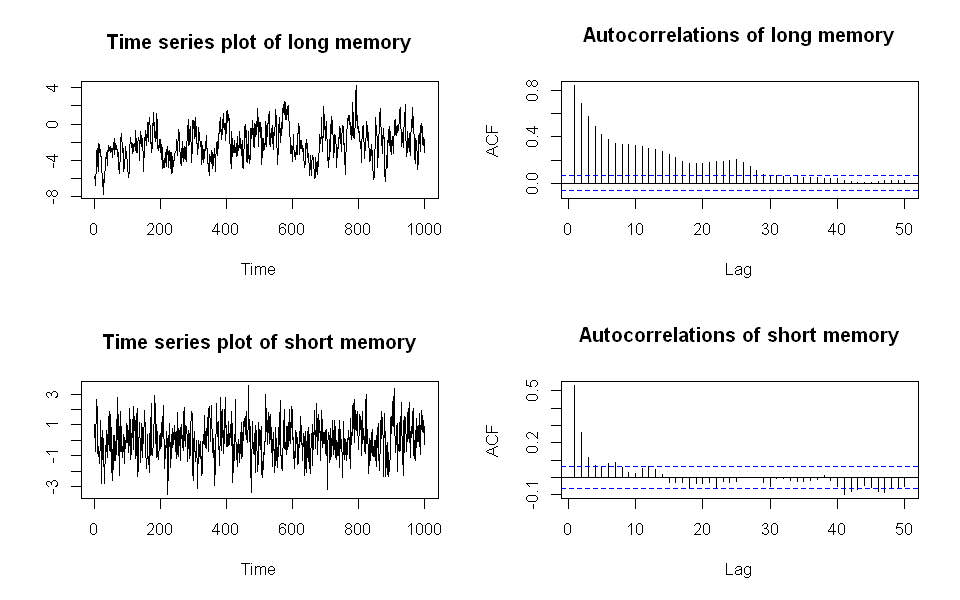

In [24]:
rm(list = ls())
options(repr.plot.width=8, repr.plot.height=5)
# ARFIMA(0.5,0.4,0.0)
    psi <- 0.5
    dd <- 0.4
# ARFIMA with coefficient psi and difference dd 
    y1 <- fracdiff.sim(n = 1000, ar = psi, ma = 0.0, d=0.4) 
# ARIMA(1,0,0) with coefficient psi 
    y2 <- arima.sim(model = list(ar = psi), n = 1000) 
# Graphics
par(mfrow = c(2,2))
    plot.ts(y1$series, main='Time series plot of long memory', ylab='')
    Acf(y1$series, lag.max = 50, main='Autocorrelations of long memory')
    plot.ts(y2, main='Time series plot of short memory', ylab='')
    Acf(y2, lag.max = 50, main='Autocorrelations of short memory')

In [25]:
#estimating ARFIMA series simulated above: 
    summary(fracdiff(y1$series, nar = 1))


Call:
  fracdiff(x = y1$series, nar = 1) 

Coefficients:
   Estimate Std. Error z value Pr(>|z|)    
d  0.310338   0.009073   34.21   <2e-16 ***
ar 0.560463   0.027625   20.29   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
sigma[eps] = 0.9561559 
[d.tol = 0.0001221, M = 100, h = 1.449e-05]
Log likelihood: -1374 ==> AIC = 2754.904 [3 deg.freedom]

# Appendix 
<a id='Appendix'></a>

<a id='BuildingARMAmodels'></a>

*Optional Read -- part from the book, for more please refer to the textbook:* 
## Building ARMA models: the Box–Jenkins approach

Although the existence of ARMA models predates them, Box and Jenkins (1976) were the first to approach the task of estimating an ARMA model in a systematic manner. Their approach was a practical and pragmatic one, involving three steps:

1. Identification 
2. Estimation
3. Diagnostic checking

These steps are now explained in greater detail.

###### Step 1

This involves determining the order of the model required to capture the dynamic features of the data. Graphical procedures are used (plotting the data over time and plotting the acf and pacf) to determine the most appropriate specification.

###### Step 2

This involves estimation of the parameters of the model specified in step 1. This can be done using least squares or another technique, known as maximum likelihood, depending on the model.

###### Step 3

This involves model checking -- i.e. determining whether the model specified and estimated is adequate. Box and Jenkins suggest two methods: **overfitting** and **residual** diagnostics. 
- Overfitting involves deliberately fitting a larger model than that required to capture the dynamics of the data as identified in stage 1. If the model specified at step 1 is adequate, any extra terms added to the ARMA model would be insignificant. 
   
- Residual diagnostics imply checking the residuals for evidence of linear dependence which, if present, would suggest that the model originally specified was inadequate to capture the features of the data. The acf, pacf or Ljung--Box tests could be used.

**Overfittion vs residual diagnostics:** 

It is worth noting that ‘diagnostic testing’ in the Box--Jenkins world essentially involves only autocorrelation tests rather than the whole barrage of tests outlined in chapter 4. Also, such approaches to determining the adequacy of the model could only reveal a model that is underparameterised (‘too small’) and would not reveal a model that is overparameterised (‘too big’).

Examining whether the residuals are free from autocorrelation is much more commonly used than overfitting, and this may partly have arisen since for ARMA models, it can give rise to common factors in the overfitted model that make estimation of this model difficult and the statistical tests ill behaved. For example, if the true model is an ARMA(1,1) and we deliberately then fit an ARMA(2,2) there will be a common factor so that not all of the parameters in the latter model can be identified. This problem does not arise with pure AR or MA models, only with mixed processes.

**Parsimonious model$^1$:**

It is usually the objective to form a parsimonious model, which is one that describes all of the features of data of interest using as few parameters (i.e. as simple a model) as possible. A parsimonious model is desirable because:

- The *residual sum of squares* is inversely proportional to the number of *degrees of freedom*. A model which contains irrelevant lags of the variable or of the error term (and therefore unnecessary parameters) will usually lead to increased *coefficient standard errors*, implying that it will be more difficult to find significant relationships in the data. Whether an increase in the number of variables (i.e. a reduction in the number of degrees of freedom) will actually cause the estimated parameter standard errors to rise or fall will obviously depend on how much the $RSS$ falls, and on the relative sizes of $T$ and $k$. If $T$ is very large relative to $k$, then the decrease in $RSS$ is likely to outweigh the reduction in $T − k$ so that the standard errors fall. Hence ‘large’ models with many parameters are more often chosen when the sample size is large.

- Models that are profligate might be inclined to fit to data specific features, which would not be replicated out-of-sample. This means that the models may appear to fit the data very well, with perhaps a high value of $R^2$, but would give very inaccurate forecasts. Another interpretation of this concept, borrowed from physics, is that of the distinction between ‘signal’ and ‘noise’. The idea is to fit a model which captures the signal (the important features of the data, or the underlying trends or patterns), but which does not try to fit a spurious model to the noise (the completely random aspect of the series).

#### 5.7.1 Information criteria for ARMA model selection

The identification stage would now typically not be done using graphical plots of the acf and pacf. The reason is that when ‘messy’ real data is used, it unfortunately rarely exhibits the simple patterns of figures 5.2--5.8. This makes the acf and pacf very hard to interpret, and thus it is difficult to specify a model for the data. Another technique, which removes some of the subjectivity involved in interpreting the acf and pacf, is to use what are known as information criteria. Information criteria embody two factors: a term which is a function of the residual sum of squares (RSS), and some penalty for the loss of degrees of freedom from adding extra parameters. So, adding a new variable or an additional lag to a model will have two competing effects on the information criteria: the residual sum of squares will fall but the value of the penalty term will increase.

The object is to choose the number of parameters which minimises the value of the information criteria. So, adding an extra term will reduce the value of the criteria only if the fall in the residual sum of squares is sufficient to more than outweigh the increased value of the penalty term. There are several different criteria, which vary according to how stiff the penalty term is. The three most popular information criteria are Akaike’s (1974) information criterion (**AIC**), Schwarz’s (1978) Bayesian information criterion (**SBIC**), and the Hannan--Quinn criterion (**HQIC**).

It is worth noting that **SBIC** embodies a much stiffer penalty term than **AIC**, while **HQIC** is somewhere in between. The adjusted $R^2$ measure can also be viewed as an information criterion, although it is a very soft one, which would typically select the largest models of all.


#### 5.7.2 Which criterion should be preferred if they suggest different model orders?

**SBIC** is strongly consistent (but inefficient) and **AIC** is not consistent, but is generally more efficient. In other words, **SBIC** will asymptotically deliver the correct model order, while **AIC** will deliver on average too large a model, even with an infinite amount of data. On the other hand, the average variation in selected model orders from different samples within a given population will be greater in the context of **SBIC** than **AIC**. Overall, then, no criterion is definitely superior to others.

============================================================================================== 

1. *Parsimonious models* -- https://www.statology.org/parsimonious-model/

______________________________________
______________________________________
______________________________________

**Short Time Series:**

In [26]:
data <- read.table("CZK_EUR_2008.txt")$V1
length(data)/12 

[1] 24.33333

In [27]:
length(data)


[1] 292


	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -1.8056, Lag order = 1, p-value = 0.6581
alternative hypothesis: stationary


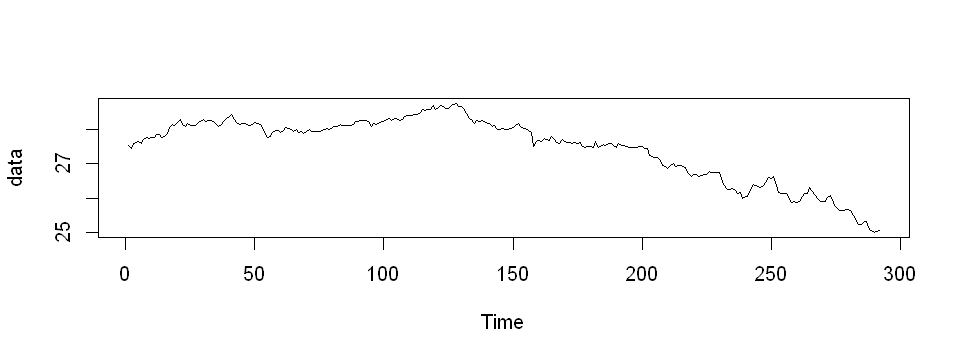


	Augmented Dickey-Fuller Test

data:  returns
Dickey-Fuller = -3.5698, Lag order = 1, p-value = 0.03649
alternative hypothesis: stationary


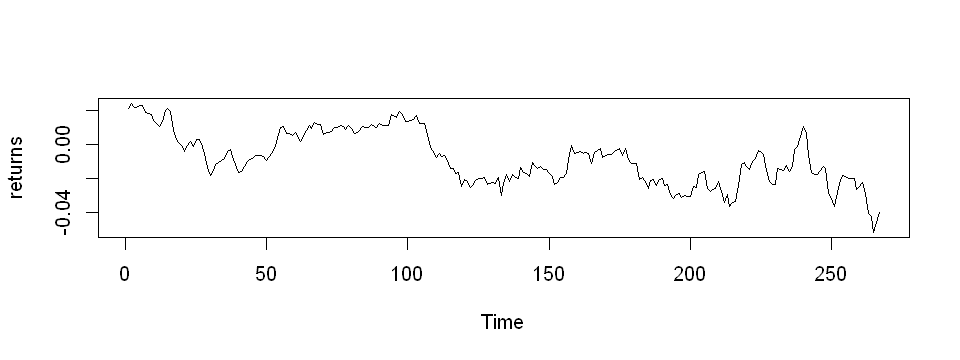

Series: returns 
ARIMA(1,0,4) with non-zero mean 

Coefficients:
         ar1     ma1     ma2      ma3      ma4     mean
      0.9751  0.1570  0.0435  -0.0263  -0.1744  -0.0087
s.e.  0.0183  0.0653  0.0681   0.0647   0.0694   0.0085

sigma^2 estimated as 1.578e-05:  log likelihood=1098.64
AIC=-2183.27   AICc=-2182.84   BIC=-2158.16


Call:
arima(x = returns, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.1580  -0.1922    -0.0085
s.e.  0.0602   0.0613     0.0066

sigma^2 estimated as 1.581e-05:  log likelihood = 1095.46,  aic = -2182.91

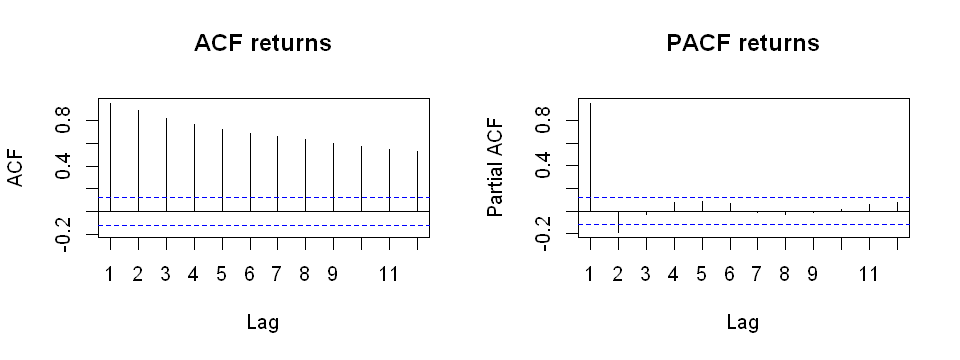


	Box-Ljung test

data:  fit.manual$residuals
X-squared = 25.615, df = 20, p-value = 0.1789



	Jarque Bera Test

data:  residuals
X-squared = 15.062, df = 2, p-value = 0.0005361


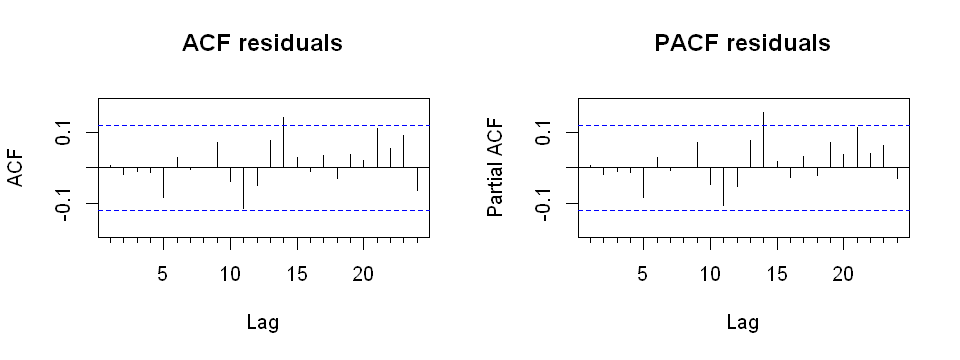

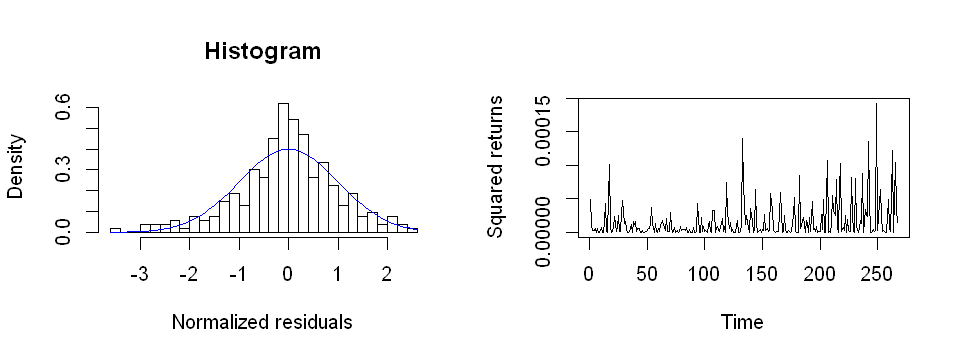

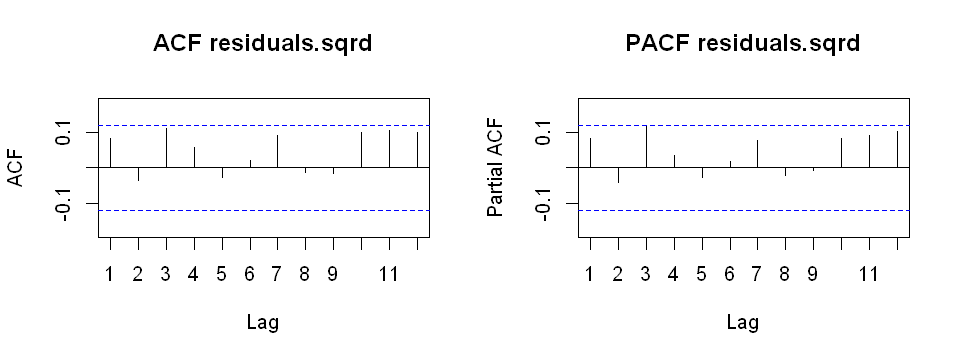

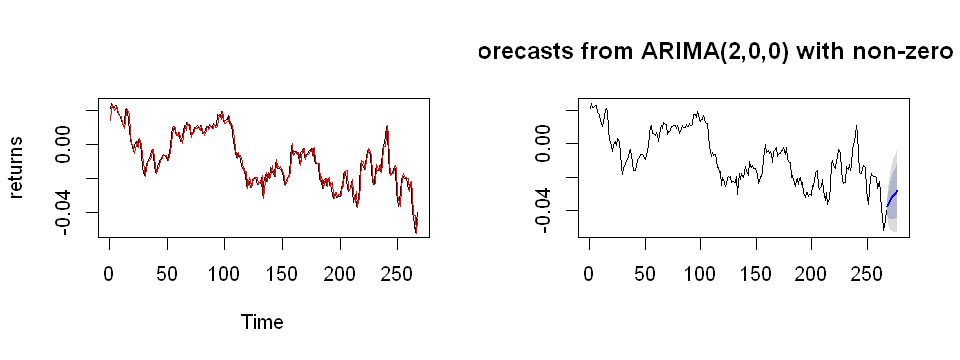

In [28]:
rm(list = ls())
options(repr.plot.width=8, repr.plot.height=3)

data <- read.table("CZK_EUR_2008.txt")$V1
    plot.ts(data)
    adf.test(data, k = 1)
returns <- diff(log(data), lag =25) #monthly
    plot.ts(returns)
    adf.test(returns, k = 1)
par(mfrow=c(1,2))
    Acf(returns, lag.max = 12, main="ACF returns")
    Pacf(returns, lag.max = 12, main="PACF returns")

    (fit.auto <- auto.arima(returns, seasonal = FALSE, stationary = TRUE, ic = 'aicc', stepwise = FALSE))
    (fit.manual <- arima(returns, order = c(2, 0, 0)))

par(mfrow = c(1,2))
    Acf(fit.auto$residuals, main = "ACF residuals")
    Pacf(fit.auto$residuals, main = "PACF residuals")

    Box.test(fit.manual$residuals,  lag = 20, type = c("Ljung-Box"))

    residuals <- fit.manual$residuals
    residuals.norm <- residuals/sqrt(fit.manual$sigma2)
    hist(residuals.norm, prob = TRUE, breaks=40, xlab = "Normalized residuals", main="Histogram")
    curve(dnorm(x, mean = 0, sd = 1), col="blue", lwd=1, add=TRUE)

    jarque.bera.test(residuals)

    residuals.sqrd <- residuals^2
    plot.ts(residuals.sqrd, ylab = "Squared returns")

par(mfrow=c(1,2))
    Acf(residuals.sqrd, lag.max = 12, main="ACF residuals.sqrd")
    Pacf(residuals.sqrd, lag.max = 12, main="PACF residuals.sqrd")

plot.ts(returns)
    lines(fitted(fit.manual), col = "red")

    fcast <- forecast(fit.manual, h=10)
    plot(fcast)

**Long Time Series:**

In [29]:
data <- read.table("CZK_EUR_2017-20.txt")$V1
length(data)/4 # we have four years of daily data - it includes non trading days (padded with previous value)

[1] 365

[1] "Now lets try to model exchange rate for longer period"



	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -2.5793, Lag order = 1, p-value = 0.3331
alternative hypothesis: stationary


[1] "According to the ADF test, data are not stationary. We have to stationarize them. As it is common in finance applications, let's compute the log returns"


Warning message in adf.test(returns, k = 1):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  returns
Dickey-Fuller = -4.6256, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


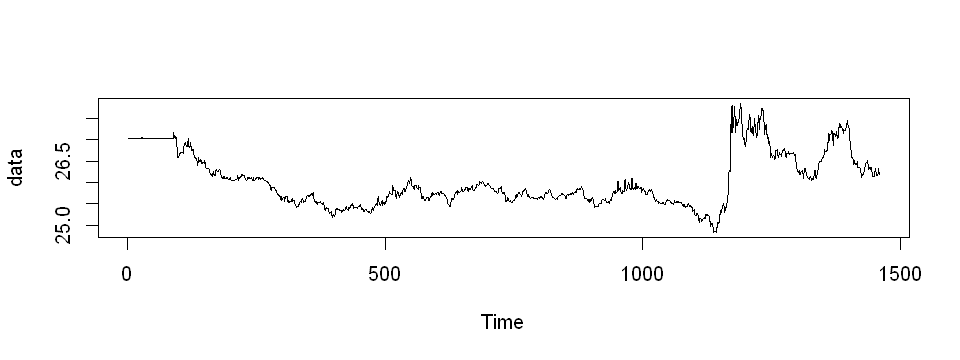

[1] "Which model to choose?"


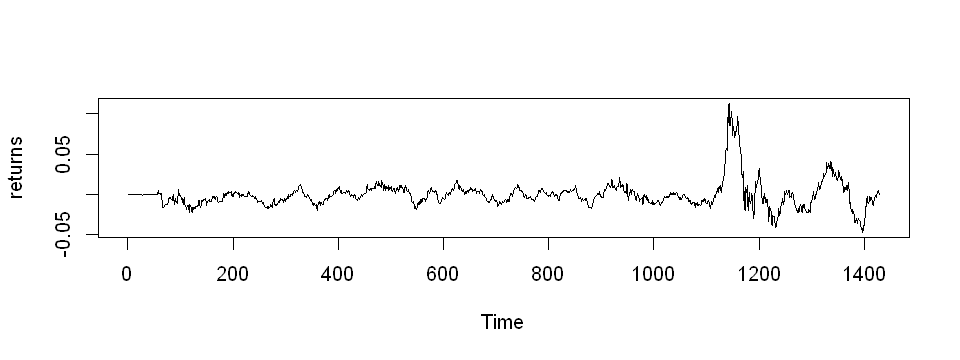

[1] "autofit"


Series: returns 
ARIMA(2,0,2) with zero mean 

Coefficients:
         ar1     ar2     ma1      ma2
      0.1232  0.8242  0.8293  -0.0814
s.e.  0.0335  0.0318  0.0412   0.0282

sigma^2 estimated as 1.625e-05:  log likelihood=5851.86
AIC=-11693.72   AICc=-11693.68   BIC=-11667.4


Call:
arima(x = returns, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9677    -0.0006
s.e.  0.0065     0.0033

sigma^2 estimated as 1.646e-05:  log likelihood = 5840.78,  aic = -11675.56

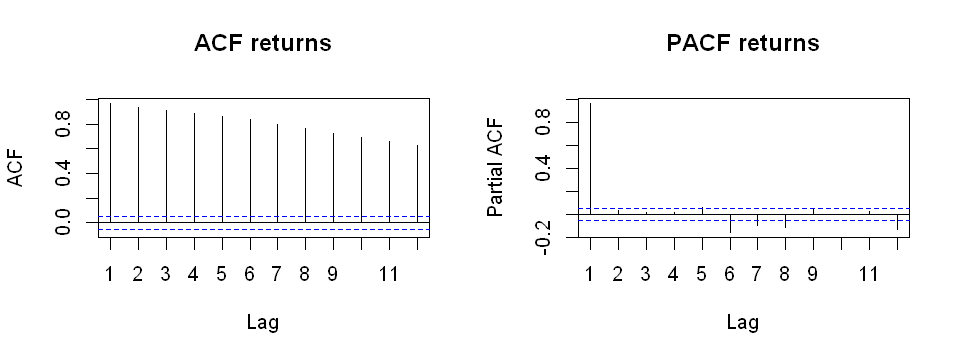

[1] "Ljung-Box test"



	Box-Ljung test

data:  fit.manual$residuals
X-squared = 157.15, df = 20, p-value < 2.2e-16


[1] "Let's check the residuals for manual fit. Let's investigate whether there is some dependency left in them"



	Jarque Bera Test

data:  residuals
X-squared = 22210, df = 2, p-value < 2.2e-16


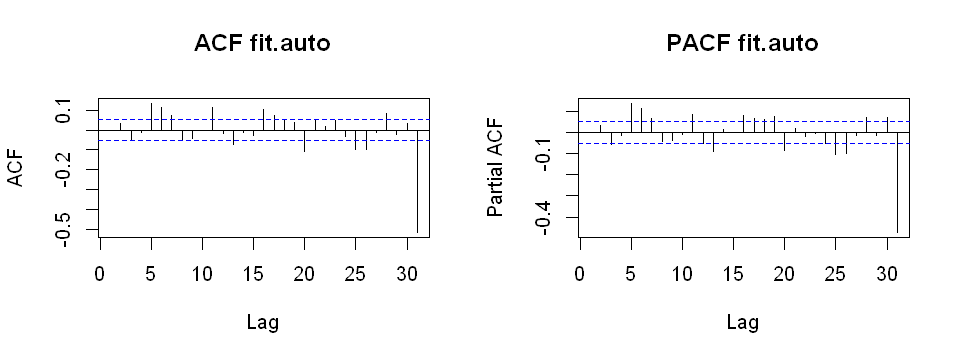

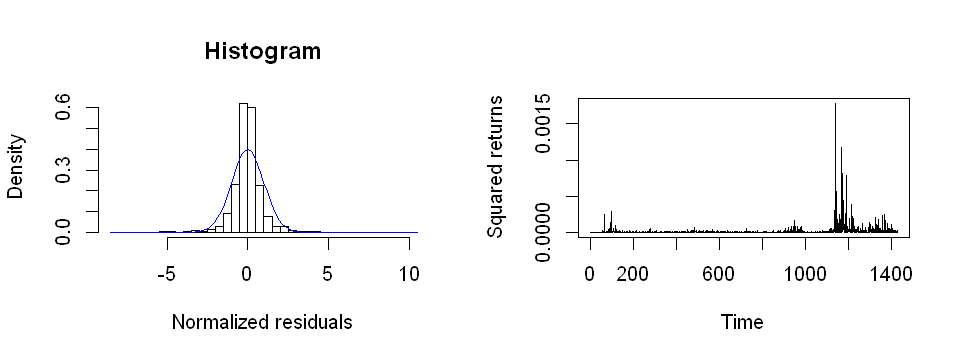

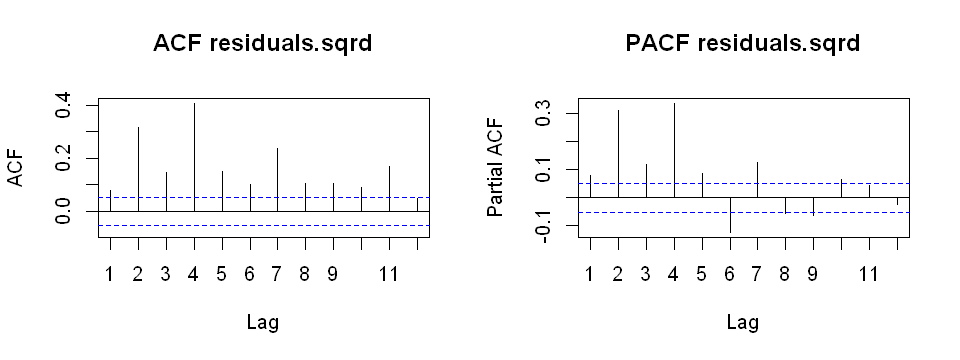

[1] "Let's try to forecast the future values using our model"


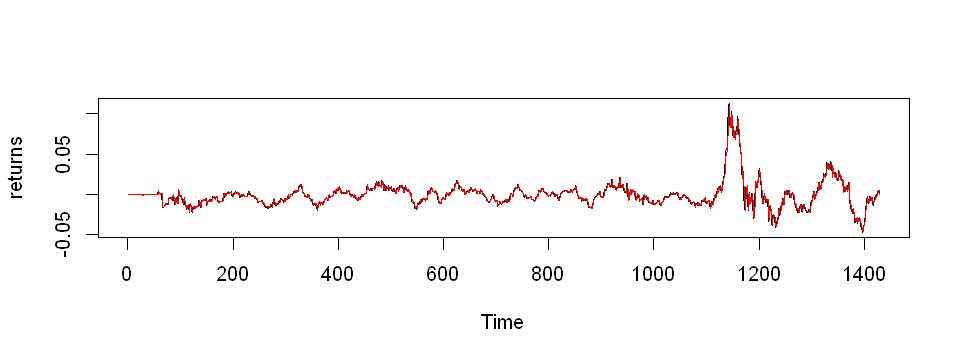

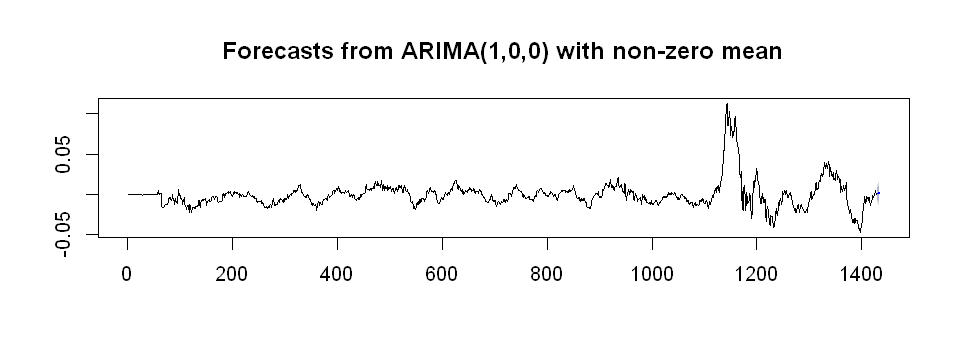

In [30]:
rm(list = ls())
options(repr.plot.width=8, repr.plot.height=3) 
data <- read.table("CZK_EUR_2017-20.txt")$V1

print("Now lets try to model exchange rate for longer period")

plot.ts(data)
adf.test(data, k = 1)

print("According to the ADF test, data are not stationary. We have to stationarize them. As it is common in finance applications, let's compute the log returns")
returns <- diff(log(data), lag = 31)
adf.test(returns, k = 1)
plot.ts(returns)

print("Which model to choose?")
par(mfrow=c(1,2))
Acf(returns, lag.max = 12, main="ACF returns")
Pacf(returns, lag.max = 12, main="PACF returns")

print("autofit")
(fit.auto <- auto.arima(returns, seasonal = FALSE, stationary = TRUE, ic = 'aicc', stepwise = FALSE))
(fit.manual <- arima(returns, order = c(1,0,0)))

par(mfrow = c(1,2))
Acf(fit.auto$residuals, main = "ACF fit.auto")
Pacf(fit.auto$residuals, main = "PACF fit.auto")

print("Ljung-Box test")
Box.test(fit.manual$residuals,  lag = 20, type = c("Ljung-Box"))

print("Let's check the residuals for manual fit. Let's investigate whether there is some dependency left in them")
residuals <- fit.manual$residuals
residuals.norm <- residuals/sqrt(fit.manual$sigma2)
hist(residuals.norm, prob = TRUE, breaks=40, xlab = "Normalized residuals", main="Histogram")
curve(dnorm(x, mean = 0, sd = 1), col="blue", lwd=1, add=TRUE)

jarque.bera.test(residuals)

residuals.sqrd <- residuals^2
plot.ts(residuals.sqrd, ylab = "Squared returns")

par(mfrow=c(1,2))
Acf(residuals.sqrd, lag.max = 12, main="ACF residuals.sqrd")
Pacf(residuals.sqrd, lag.max = 12, main="PACF residuals.sqrd")

par(mfrow=c(1,1))
plot.ts(returns)
lines(fitted(fit.manual), col = "red")

print("Let's try to forecast the future values using our model")
fcast <- forecast(fit.manual, h=5)
plot(fcast)

**An Introduction to Spatial Econometrics in R** -- http://www.econ.uiuc.edu/~lab/workshop/Spatial_in_R.html